# Actividad 2 (Caso grupal): Usos reales de filtros espaciales y morfológicos
Realizado por:
* Nicolás Felipe Trujillo Montero
* Rubén González Navarro
* José María Pérez Martín

In [1]:
import random
import cv2
import numpy as np
from tqdm import tqdm
from skimage import data, color
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def _open(src_img, kernel, iterations):
    _img_eroded = cv2.erode(src_img, kernel, iterations = iterations)
    _img_final = cv2.dilate(_img_eroded, kernel, iterations = iterations)
    return _img_final

In [3]:
def _close(src_img, kernel, iterations):
    _img_dilated = cv2.dilate(src_img, kernel, iterations = iterations)
    _img_final = cv2.erode(_img_dilated, kernel, iterations = iterations)
    return _img_final

In [4]:
def salt_pepper_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

In [5]:
def MedianFilter(img_noise, N=3):
    n_fil, n_col = img_noise.shape[0], img_noise.shape[1]
    
    for idx_x in range(n_fil):
        
        for idx_y in range(n_col):
           
            esq = (int(N/2))
            wdw = []
            
            for idx_x_wd in range(idx_x-esq, idx_x+esq+1):
                
                for idx_y_wd in range(idx_y-esq, idx_y+esq+1):
                    
                    if not( (idx_x_wd < 0) | (idx_x_wd >= n_fil) | \
                        (idx_y_wd < 0) | (idx_y_wd >= n_col) ):
                        wdw.append(img_noise[idx_x_wd][idx_y_wd])
            
            img_noise[idx_x][idx_y] = np.median(wdw)
            
    return img_noise

In [6]:
# En este caso, vamos a aplicar con opencv los filtros que hemos visto.
img_list = ["byn.png"]

kernel_cruz = np.array([[0,1,0], [1,1,1], [0,1,0]], np.uint8)

kernel_cuadrado = np.ones((5, 5), np.uint8)

kernel = kernel_cruz

iterations = 5

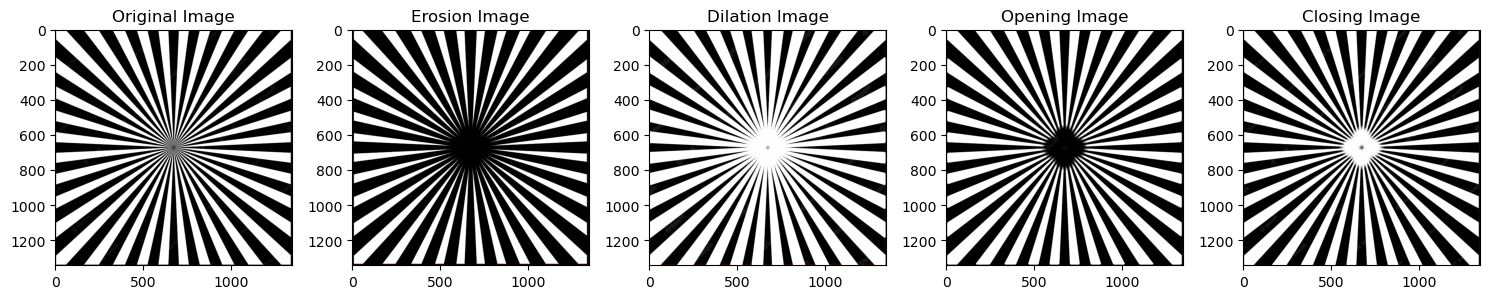

In [7]:
fig, ax = plt.subplots(len(img_list), 5, figsize=(15, 15))

for _img, _idx_img in zip(img_list, range(len(img_list)) ):
    
    img = io.imread(_img)
    
    # 1.- Por cada imagen, enseñamos la original

    ax[0].imshow(img, aspect='equal')
    ax[0].set_title('Original Image')
    
    # 2.- Pasamos por la operacion de Erosion
    _img_eroded = cv2.erode(img, kernel, iterations = iterations)

    ax[1].imshow(_img_eroded, aspect='equal')
    ax[1].set_title('{} Image'.format("Erosion"))
    
    # 3.- Pasamos por la operacion de Dilatacion
    _img_dilated = cv2.dilate(img, kernel, iterations = iterations)

    ax[2].imshow(_img_dilated, aspect='equal')
    ax[2].set_title('{} Image'.format("Dilation"))
    
    # 4.- Pasamos por la operacion de Apertura
    _img_opened = _open(img, kernel, iterations)

    ax[3].imshow(_img_opened, aspect='equal')
    ax[3].set_title('{} Image'.format("Opening"))
    
    # 5.- Pasamos por la operacion de Cierre
    _img_closed = _close(img, kernel, iterations)

    ax[4].imshow(_img_closed, aspect='equal')
    ax[4].set_title('{} Image'.format("Closing"))
    
plt.tight_layout()
plt.show()

In [8]:
img_list = ["SOCOFing/D.png", "SOCOFing/F.png"]

kernel_recta = np.array([[0,0,0], [1,1,1], [0,0,0]], np.uint8)

kernel_diagonal = np.array([[0,0,1], [0,1,0], [1,0,0]], np.uint8)

kernel = kernel_cruz

iterations = 1

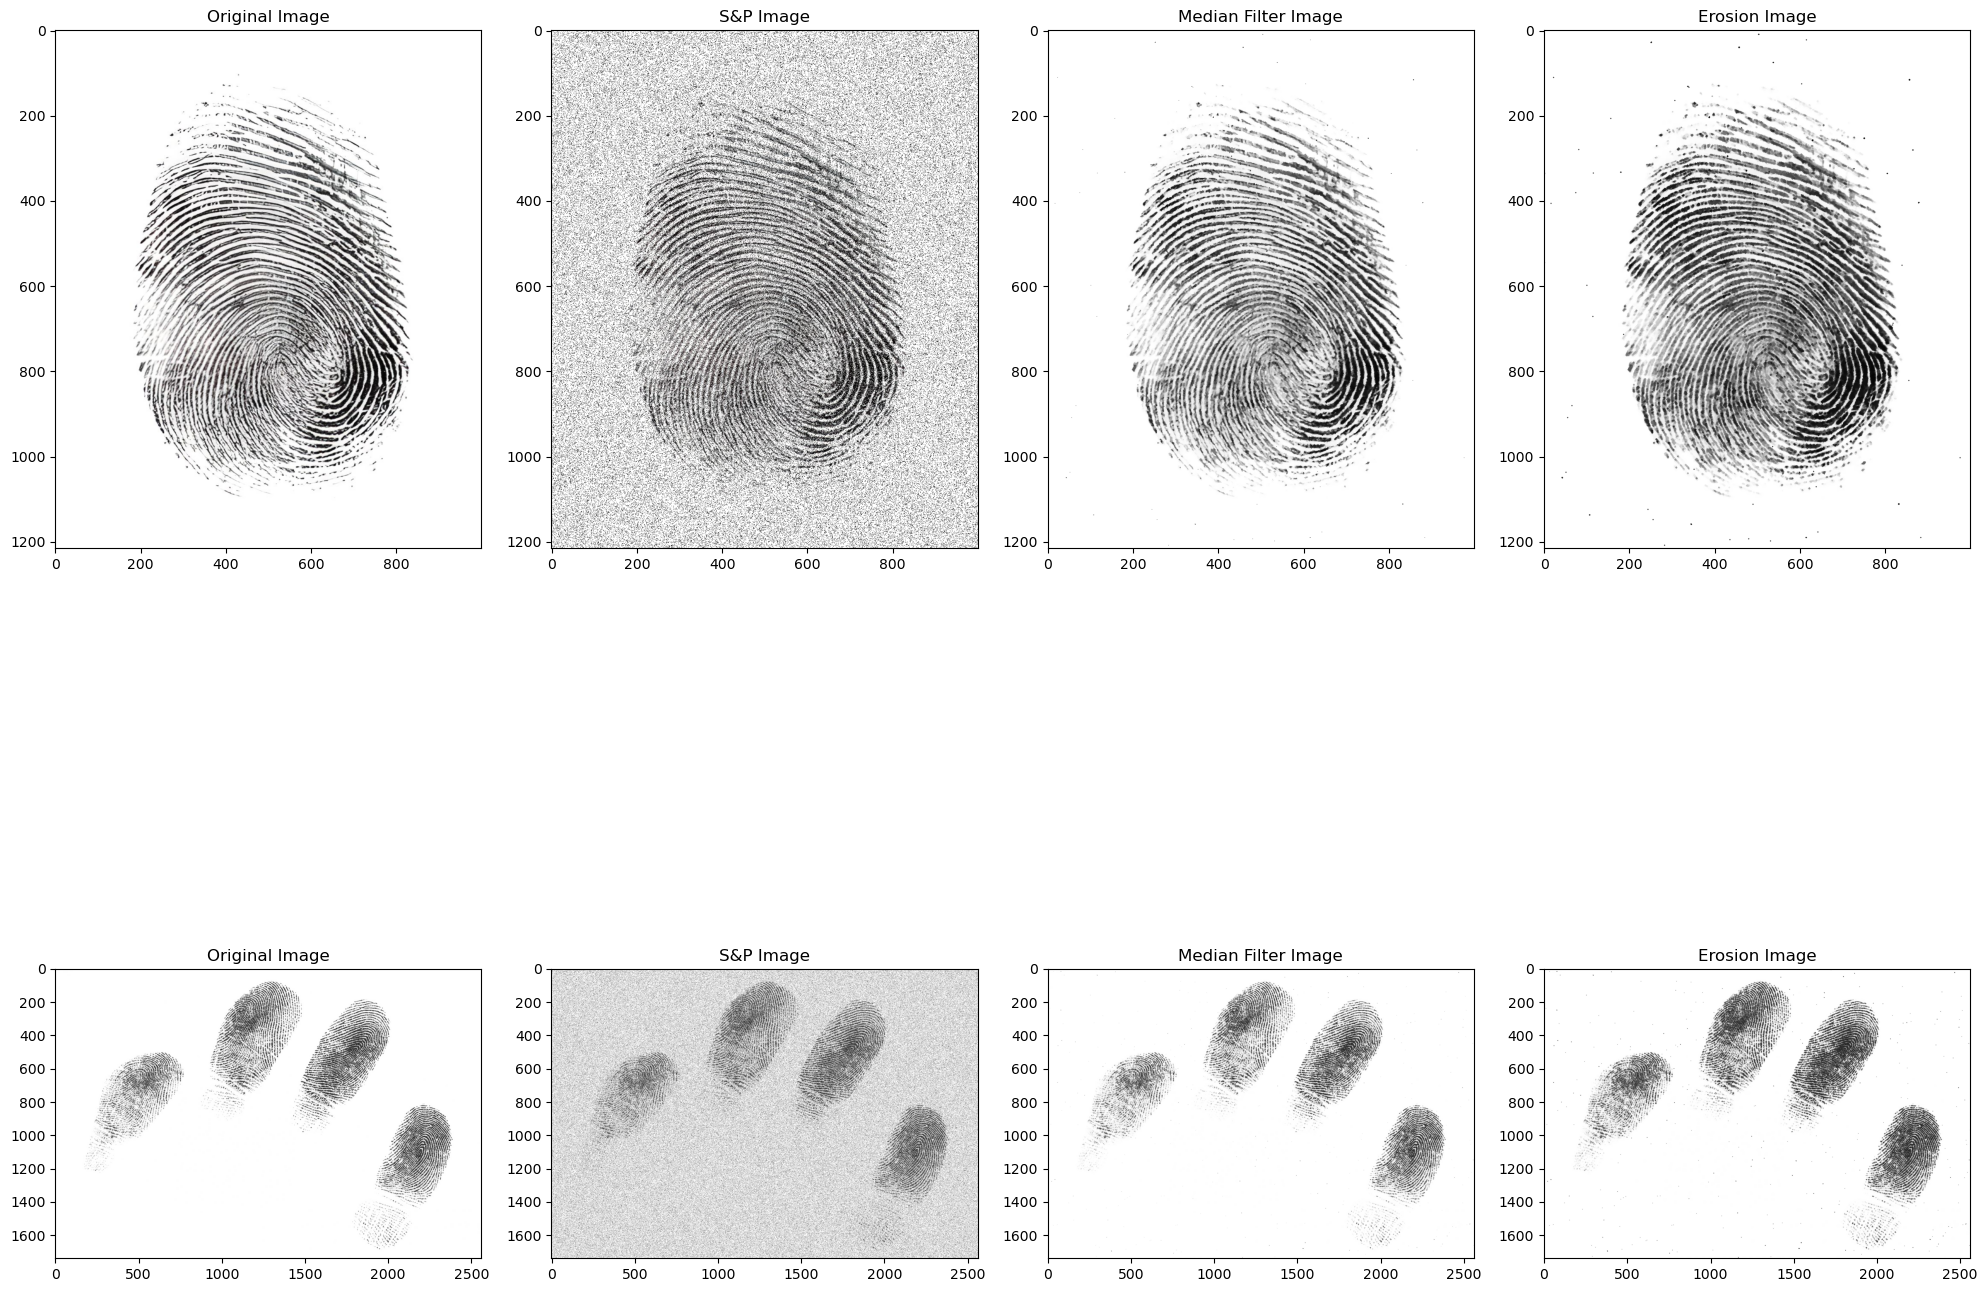

In [9]:
fig, ax = plt.subplots(len(img_list), 4, figsize=(20, 20))

img_saves = []

for _img, _idx_img in zip(img_list, range(len(img_list)) ):
    
    img = io.imread(_img)
    
    # 1.- Por cada imagen, enseñamos la original

    ax[_idx_img, 0].imshow(img, aspect='equal')
    ax[_idx_img, 0].set_title('Original Image')
    
    # 2.- Pasamos por nuestro filtro Salt & Pepper
    _img_noise = salt_pepper_noise(img, 0.30)
    img_saves.append(_img_noise)
    ax[_idx_img, 1].imshow(_img_noise, cmap=plt.get_cmap('gray'), aspect='equal')
    ax[_idx_img, 1].set_title('{} Image'.format("S&P"))
    
    # 3.- Pasamos por nuestro filtro de la Mediana
    _img_median = MedianFilter(_img_noise)
    img_saves.append(_img_median)
    ax[_idx_img, 2].imshow(_img_median, cmap=plt.get_cmap('gray'), aspect='equal')
    ax[_idx_img, 2].set_title('{} Image'.format("Median Filter"))
 
    # 4.- Pasamos por la operacion de Erosion
    _img_eroded = cv2.erode(_img_median, kernel, iterations = iterations)
    cv2.imwrite("{}".format(str(_idx_img)+".jpg"), _img_eroded)

    ax[_idx_img, 3].imshow(_img_eroded, aspect='equal')
    ax[_idx_img, 3].set_title('{} Image'.format("Erosion"))
    
plt.tight_layout()
plt.show()